# Function Transformer

## 1. Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

These are standard libraries used for:
- pandas: data manipulation
- seaborn/matplotlib: data visualization
- numpy: numerical computations

## 2. Reading and Previewing the Dataset

In [2]:
dataset = pd.read_csv("loan.csv")
dataset.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


- Reads a dataset named loan.csv.
- Displays the first 10 rows for an overview.

## 3. Checking for Missing Values

In [3]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## 4. Visualizing CoapplicantIncome Distribution

C:\Users\User\AppData\Local\Temp\ipykernel_8892\3783729653.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['CoapplicantIncome'])


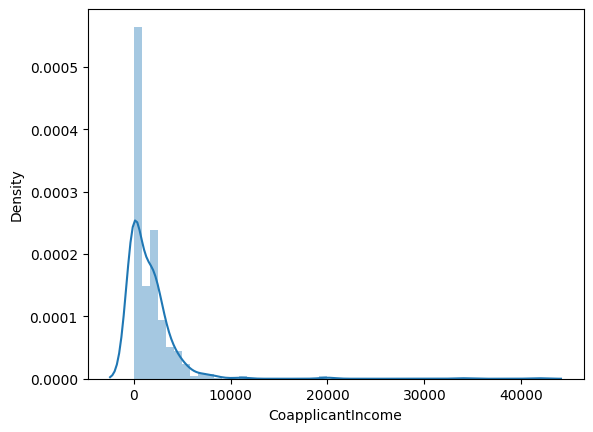

In [4]:
sns.distplot(dataset['CoapplicantIncome'])
plt.show()

- Shows the distribution of co-applicant income.
- Note: distplot is deprecated, warnings are shown. Use histplot or displot instead.

## 5. Removing Outliers from CoapplicantIncome

In [5]:
q1 = dataset['CoapplicantIncome'].quantile(0.25)
q3 = dataset['CoapplicantIncome'].quantile(0.75)
iqr = q3-q1

In [6]:
min_r = q1-(1.5 * iqr)
max_r = q3+(1.5 * iqr)

min_r ,max_r

(np.float64(-3445.875), np.float64(5743.125))

In [7]:
dataset = dataset[dataset['CoapplicantIncome'] <= max_r]

- Calculates IQR (Interquartile Range) to define outlier thresholds.
- Removes values above the upper limit (max_r) — right-side outliers only.

## 6. Visualizing Again After Outlier Removal

C:\Users\User\AppData\Local\Temp\ipykernel_8892\3783729653.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['CoapplicantIncome'])


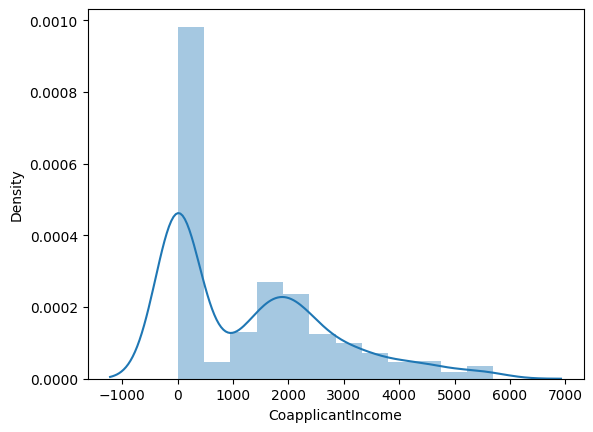

In [8]:
sns.distplot(dataset['CoapplicantIncome'])
plt.show()

- Compares the distribution after outliers are removed.

## 7. Applying Log Transformation

In [9]:
from sklearn.preprocessing import FunctionTransformer

In [10]:
ft = FunctionTransformer(func = np.log1p)

In [11]:
dataset["CoapplicantIncome_tf"] = ft.fit_transform(dataset['CoapplicantIncome'])

- Applies log transformation using np.log1p(x) (which computes log(1 + x)) to handle skewness.
- Creates a new column: CoapplicantIncome_tf.

## 8. Plotting Before vs After Log Transform

C:\Users\User\AppData\Local\Temp\ipykernel_8892\3021310408.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['CoapplicantIncome'])
C:\Users\User\AppData\Local\Temp\ipykernel_8892\3021310408.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['CoapplicantIncome_tf'])


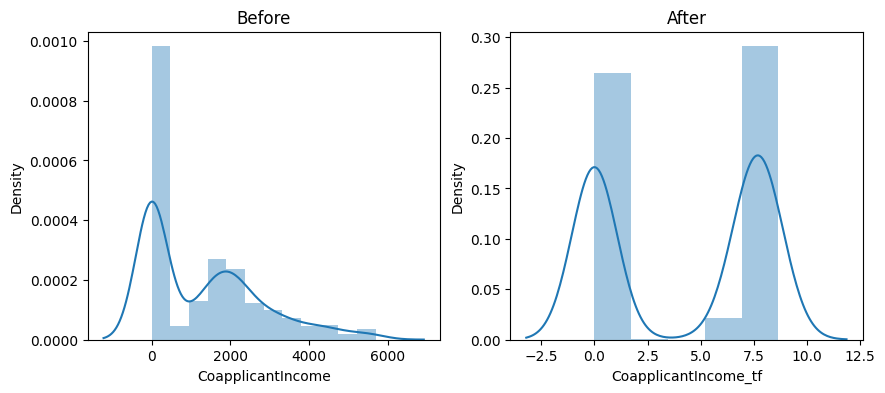

In [12]:
plt.figure(figsize = (10,4))
plt.subplot(1,2,1)
sns.distplot(dataset['CoapplicantIncome'])
plt.title('Before')

plt.subplot(1,2,2)
sns.distplot(dataset['CoapplicantIncome_tf'])
plt.title('After')
plt.show()

- Compares the original and log-transformed data distributions.

## 9. Applying a Custom Transformation (Square)

In [13]:
ft1 = FunctionTransformer(func = lambda x : x**2)
dataset["CoapplicantIncome_tf1"] = ft1.fit_transform(dataset['CoapplicantIncome'])

- Applies a square transform (x²) to the original income.
- Stores result in CoapplicantIncome_tf1.

## 10. Plotting Before vs After Square Transform

C:\Users\User\AppData\Local\Temp\ipykernel_8892\1497531254.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['CoapplicantIncome'])
C:\Users\User\AppData\Local\Temp\ipykernel_8892\1497531254.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['CoapplicantIncome_tf1'])


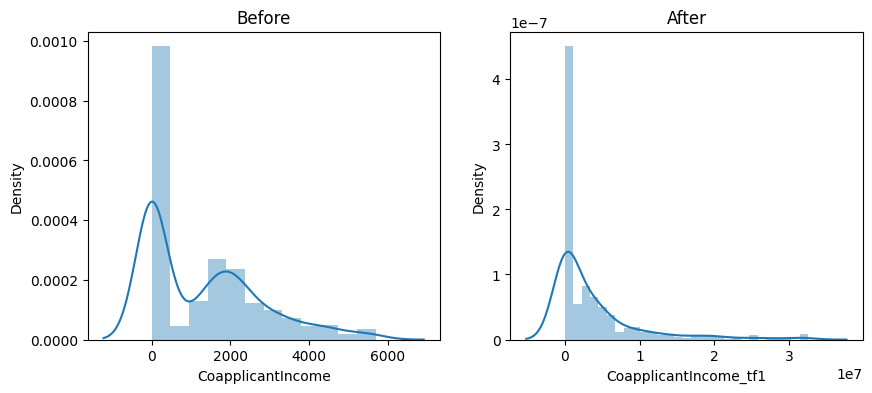

In [14]:
plt.figure(figsize = (10,4))
plt.subplot(1,2,1)
sns.distplot(dataset['CoapplicantIncome'])
plt.title('Before')

plt.subplot(1,2,2)
sns.distplot(dataset['CoapplicantIncome_tf1'])
plt.title('After')
plt.show()

- Shows the effect of squaring the data.
- Normally used to amplify differences.

### ⚠️ Deprecation Warning
Throughout the code, there's a recurring warning:
- distplot is deprecated.

### You should use:

- sns.histplot() for similar effect.
- or sns.displot() for more flexibility.

### ✅ Summary
The code demonstrates:

- Data cleaning (missing values, outliers)
- Data transformation using FunctionTransformer
- Visual comparison of original vs transformed data
- Use of different transformation techniques (log1p, x²)